In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer, precision_score, f1_score

import pandas as pd
import pickle
import string
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
def display_tree(feature_names, tree):
    """ For binary classification only """
    dot = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=tree.classes_.astype(str), impurity=False)
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    #dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])', '', dot)
    dot = re.sub(     '(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n', '', dot)
    return graphviz.Source(dot)

In [12]:
display_tree(X_binary.columns, model)

NameError: name 'X_binary' is not defined

In [6]:
tree_object = pickle.load(open("../results/models/decisiontreeclassifier", 'rb'))

In [7]:
tree_object.

DecisionTreeClassifier(max_depth=5)

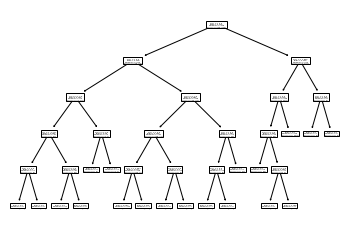

In [15]:
tree.plot_tree(tree_object);

In [16]:
gaussian = pd.read_csv("../results/model_scores/gaussiannb_hyperparameters.csv")

In [25]:
gaussian = gaussian.set_index("param_gaussiannb__var_smoothing")


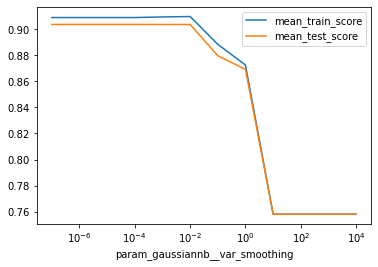

In [31]:
ax = gaussian[["mean_train_score", "mean_test_score"]].plot()
ax.set_xscale('log') 

In [27]:
gaussian

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
param_gaussiannb__var_smoothing,,,,,,,,,,,,,,,,,,,,
1.000000e-07,0.024555,0.005886,0.013808,0.006360,{'gaussiannb__var_smoothing': 1e-07},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-06,0.021934,0.005722,0.015018,0.005678,{'gaussiannb__var_smoothing': 1e-06},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-05,0.020710,0.001737,0.013161,0.002855,{'gaussiannb__var_smoothing': 1e-05},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-04,0.019928,0.002064,0.011178,0.001043,{'gaussiannb__var_smoothing': 0.0001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-03,0.026179,0.010728,0.017967,0.008318,{'gaussiannb__var_smoothing': 0.001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.897243,0.896552,0.920097,0.907317,0.909230,0.011601
1.000000e-02,0.026831,0.009298,0.017772,0.004838,{'gaussiannb__var_smoothing': 0.01},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.911765,0.898990,0.907731,0.921951,0.907317,0.909551,0.007463
1.000000e-01,0.024676,0.004216,0.010969,0.000972,{'gaussiannb__var_smoothing': 0.1},0.871287,0.918367,0.863158,0.872340,0.872340,0.879499,0.019737,7,0.901042,0.878947,0.892308,0.884319,0.884817,0.888286,0.007666
1.000000e+00,0.020119,0.001671,0.011736,0.001483,{'gaussiannb__var_smoothing': 1},0.826923,0.895833,0.884211,0.854167,0.884211,0.869069,0.025192,8,0.872727,0.884211,0.887139,0.860051,0.857868,0.872399,0.012004
1.000000e+01,0.024538,0.007431,0.013775,0.004854,{'gaussiannb__var_smoothing': 10},0.755556,0.761194,0.761194,0.761194,0.751880,0.758203,0.003843,9,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957


In [32]:
decision = pd.read_csv("../results/model_scores/decisiontreeclassifier_hyperparameters.csv")

In [34]:
decision.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027205,0.006695,0.014836,0.006129,1,1,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
1,0.021642,0.003291,0.019917,0.009166,1,2,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
2,0.020172,0.002858,0.011502,0.001384,1,3,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
3,0.030554,0.012566,0.015366,0.005469,1,4,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
4,0.022673,0.008549,0.015595,0.010087,2,1,"{'decisiontreeclassifier__max_depth': 2, 'deci...",0.895238,0.901961,0.865979,...,0.879064,0.017054,29,0.886700,0.885086,0.887755,0.885496,0.898765,0.88876,0.005090


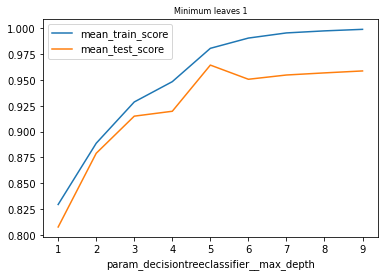

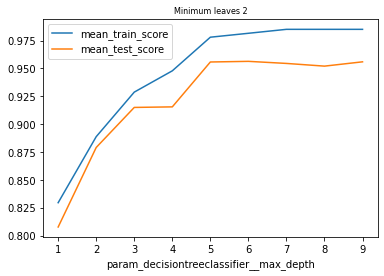

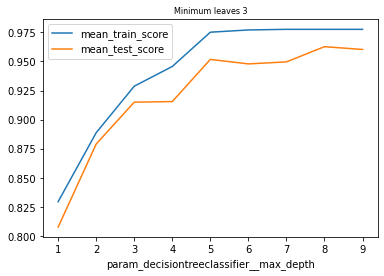

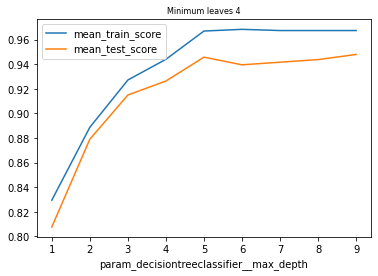

In [47]:
for i in range(1,5):
    decision_min1 = decision.query("param_decisiontreeclassifier__min_samples_leaf == @i")
    decision_min1 = decision_min1.set_index("param_decisiontreeclassifier__max_depth")
    decision_min1[["mean_train_score", "mean_test_score"]].plot().set_title(f"Minimum leaves {i}", fontdict={'fontsize': 8, 'fontweight': 'medium'}) 

In [38]:
decision_min1 = decision_min1.set_index("param_decisiontreeclassifier__max_depth")

<AxesSubplot:xlabel='param_decisiontreeclassifier__max_depth'>

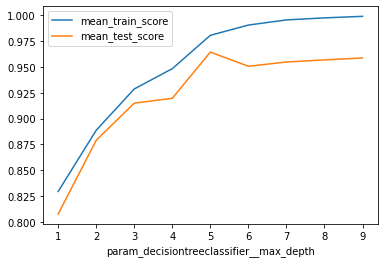

In [40]:
decision_min1[["mean_train_score", "mean_test_score"]].plot()

In [48]:
logistic = pd.read_csv("../results/model_scores/logisticregression_hyperparameters.csv")

In [51]:
logistic[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040509,0.007036,0.011330,0.001318,1.000000e-07,newton-cg,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
1,0.032036,0.006536,0.015569,0.009715,1.000000e-07,lbfgs,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
2,0.025912,0.005491,0.014337,0.005850,1.000000e-07,liblinear,"{'logisticregression__C': 1e-07, 'logisticregr...",0.790698,0.803150,0.772727,...,0.775930,0.018787,23,0.776291,0.773333,0.761726,0.764595,0.786127,0.772414,0.008710
3,0.158423,0.039821,0.011475,0.003388,1.000000e-07,sag,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
4,0.173661,0.066516,0.012422,0.001934,1.000000e-07,saga,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
5,0.025628,0.002129,0.009519,0.001095,1.000000e-06,newton-cg,"{'logisticregression__C': 1e-06, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
6,0.033727,0.010485,0.013442,0.007601,1.000000e-06,lbfgs,"{'logisticregression__C': 1e-06, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
7,0.022876,0.006410,0.013334,0.004300,1.000000e-06,liblinear,"{'logisticregression__C': 1e-06, 'logisticregr...",0.790698,0.803150,0.772727,...,0.775930,0.018787,23,0.776291,0.773333,0.761726,0.764595,0.786127,0.772414,0.008710
8,0.038402,0.001023,0.010187,0.000980,1.000000e-06,sag,"{'logisticregression__C': 1e-06, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
9,0.094348,0.019817,0.018625,0.007471,1.000000e-06,saga,"{'logisticregression__C': 1e-06, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957


In [52]:
solver = ("newton-cg", "lbfgs", "liblinear", "sag", "saga")

In [60]:
for method in solver:
    print(method)

newton-cg
lbfgs
liblinear
sag
saga


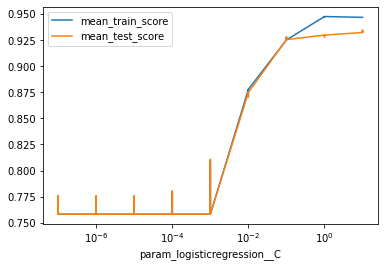

In [65]:
logistic_mini = logistic.query("param_logisticregression__solver == 'saga'")
logistic_mini =  logistic.set_index("param_logisticregression__C")
ax = logistic_mini[["mean_train_score", "mean_test_score"]].plot()
ax.set_xscale('log')

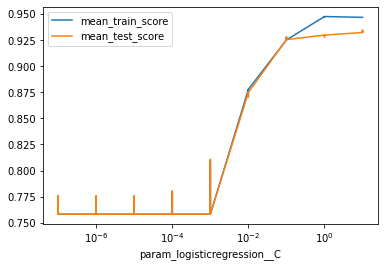

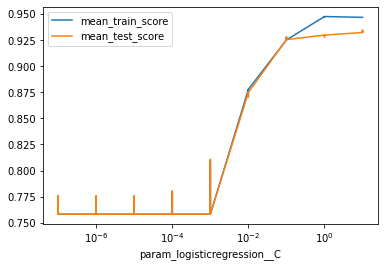

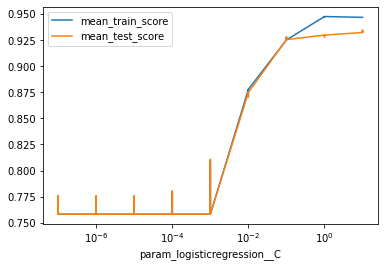

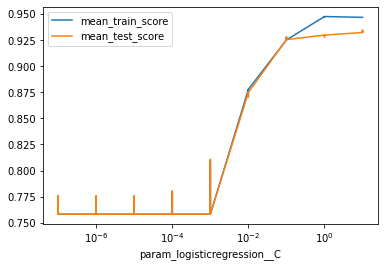

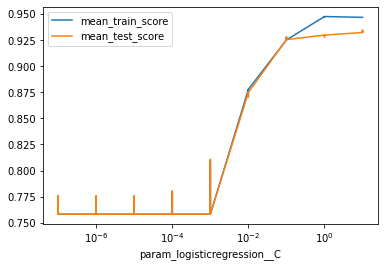

In [62]:
for method in solver:
    logistic_mini = logistic.query("param_logisticregression__solver == @method")
    logistic_mini =  logistic.set_index("param_logisticregression__C")
    ax = logistic_mini[["mean_train_score", "mean_test_score"]].plot()
    ax.set_xscale('log')

In [66]:
gaussian

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
param_gaussiannb__var_smoothing,,,,,,,,,,,,,,,,,,,,
1.000000e-07,0.024555,0.005886,0.013808,0.006360,{'gaussiannb__var_smoothing': 1e-07},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-06,0.021934,0.005722,0.015018,0.005678,{'gaussiannb__var_smoothing': 1e-06},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-05,0.020710,0.001737,0.013161,0.002855,{'gaussiannb__var_smoothing': 1e-05},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-04,0.019928,0.002064,0.011178,0.001043,{'gaussiannb__var_smoothing': 0.0001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-03,0.026179,0.010728,0.017967,0.008318,{'gaussiannb__var_smoothing': 0.001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.897243,0.896552,0.920097,0.907317,0.909230,0.011601
1.000000e-02,0.026831,0.009298,0.017772,0.004838,{'gaussiannb__var_smoothing': 0.01},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.911765,0.898990,0.907731,0.921951,0.907317,0.909551,0.007463
1.000000e-01,0.024676,0.004216,0.010969,0.000972,{'gaussiannb__var_smoothing': 0.1},0.871287,0.918367,0.863158,0.872340,0.872340,0.879499,0.019737,7,0.901042,0.878947,0.892308,0.884319,0.884817,0.888286,0.007666
1.000000e+00,0.020119,0.001671,0.011736,0.001483,{'gaussiannb__var_smoothing': 1},0.826923,0.895833,0.884211,0.854167,0.884211,0.869069,0.025192,8,0.872727,0.884211,0.887139,0.860051,0.857868,0.872399,0.012004
1.000000e+01,0.024538,0.007431,0.013775,0.004854,{'gaussiannb__var_smoothing': 10},0.755556,0.761194,0.761194,0.761194,0.751880,0.758203,0.003843,9,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957


### PART 2


In [68]:
gaussian2 = gaussian.reset_index()

In [79]:
gaussian2[["mean_fit_time" , "mean_score_time", "mean_train_score", "mean_test_score"]]

,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
0,0.024555,0.013808,0.908781,0.903475
1,0.021934,0.015018,0.908781,0.903475
2,0.020710,0.013161,0.908781,0.903475
3,0.019928,0.011178,0.908781,0.903475
4,0.026179,0.017967,0.909230,0.903475
5,0.026831,0.017772,0.909551,0.903475
6,0.024676,0.010969,0.888286,0.879499
7,0.020119,0.011736,0.872399,0.869069
8,0.024538,0.013775,0.758209,0.758203
9,0.019606,0.009812,0.758209,0.758203


In [81]:
decision.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027205,0.006695,0.014836,0.006129,1,1,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
1,0.021642,0.003291,0.019917,0.009166,1,2,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
2,0.020172,0.002858,0.011502,0.001384,1,3,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
3,0.030554,0.012566,0.015366,0.005469,1,4,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.865979,0.838710,0.795455,...,0.807704,0.038937,33,0.825485,0.832877,0.817143,0.824859,0.847185,0.82951,0.010144
4,0.022673,0.008549,0.015595,0.010087,2,1,"{'decisiontreeclassifier__max_depth': 2, 'deci...",0.895238,0.901961,0.865979,...,0.879064,0.017054,29,0.886700,0.885086,0.887755,0.885496,0.898765,0.88876,0.005090


In [83]:
gaussian.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
param_gaussiannb__var_smoothing,,,,,,,,,,,,,,,,,,,,
1.000000e-07,0.024555,0.005886,0.013808,0.006360,{'gaussiannb__var_smoothing': 1e-07},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-06,0.021934,0.005722,0.015018,0.005678,{'gaussiannb__var_smoothing': 1e-06},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-05,0.020710,0.001737,0.013161,0.002855,{'gaussiannb__var_smoothing': 1e-05},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-04,0.019928,0.002064,0.011178,0.001043,{'gaussiannb__var_smoothing': 0.0001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.895000,0.896552,0.920097,0.907317,0.908781,0.012089
1.000000e-03,0.026179,0.010728,0.017967,0.008318,{'gaussiannb__var_smoothing': 0.001},0.895238,0.953271,0.891089,0.909091,0.868687,0.903475,0.028081,1,0.924939,0.897243,0.896552,0.920097,0.907317,0.909230,0.011601


In [84]:
logistic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040509,0.007036,0.011330,0.001318,1.000000e-07,newton-cg,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
1,0.032036,0.006536,0.015569,0.009715,1.000000e-07,lbfgs,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
2,0.025912,0.005491,0.014337,0.005850,1.000000e-07,liblinear,"{'logisticregression__C': 1e-07, 'logisticregr...",0.790698,0.803150,0.772727,...,0.775930,0.018787,23,0.776291,0.773333,0.761726,0.764595,0.786127,0.772414,0.008710
3,0.158423,0.039821,0.011475,0.003388,1.000000e-07,sag,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957
4,0.173661,0.066516,0.012422,0.001934,1.000000e-07,saga,"{'logisticregression__C': 1e-07, 'logisticregr...",0.755556,0.761194,0.761194,...,0.758203,0.003843,26,0.758879,0.757463,0.757463,0.757463,0.759777,0.758209,0.000957


In [167]:

row1 = decision.set_index("rank_test_score").sort_index()[["mean_fit_time" , 
                                                    "mean_score_time", "mean_train_score", "mean_test_score",
                                                   "param_decisiontreeclassifier__max_depth"]][:1]

In [168]:
row1 = row1.rename(columns ={"param_decisiontreeclassifier__max_depth":"Hyperparameter"})

In [169]:
row2 = logistic.set_index("rank_test_score").sort_index()[["mean_fit_time" , 
                                                    "mean_score_time", "mean_train_score", "mean_test_score",
                                                   "param_logisticregression__C"]][:1]
row2 = row2.rename(columns ={"param_logisticregression__C":"Hyperparameter"})

In [170]:
gauss = gaussian.reset_index()

In [171]:
gauss
row3 = gauss.set_index("rank_test_score").sort_index()[["mean_fit_time" , 
                                                    "mean_score_time", "mean_train_score", "mean_test_score",
                                                   "param_gaussiannb__var_smoothing"]][:1]
row3= row3.rename(columns ={"param_gaussiannb__var_smoothing":"Hyperparameter"})


In [172]:
table = pd.concat([row1,row2,row3], axis = 0)

In [173]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [174]:
table = table.reset_index()

In [175]:
table = table.rename(index={0: "Decision Tree", 1: "Logistic Regression", 2: "Gaussian"}) 

In [176]:
table

,rank_test_score,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,Hyperparameter
Decision Tree,1,0.0198517,0.0109830,0.9806348,0.9644099,5.0000000
Logistic Regression,1,0.0283757,0.0102007,0.9467413,0.9342351,10.0000000
Gaussian,1,0.0245554,0.0138080,0.9087810,0.9034752,0.0000001


In [180]:
table.columns = table.columns.str.title().str.replace("_", " ") 
table = table.drop(columns = "Rank Test Score")

In [181]:
table

,Mean Fit Time,Mean Score Time,Mean Train Score,Mean Test Score,Hyperparameter
Decision Tree,0.0198517,0.0109830,0.9806348,0.9644099,5.0000000
Logistic Regression,0.0283757,0.0102007,0.9467413,0.9342351,10.0000000
Gaussian,0.0245554,0.0138080,0.9087810,0.9034752,0.0000001
